# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 605


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=metric'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | invercargill
Processing Record 3 of Set 1 | qaqortoq
Processing Record 4 of Set 1 | jamestown
Processing Record 5 of Set 1 | shanting
Processing Record 6 of Set 1 | waitangi
Processing Record 7 of Set 1 | dekalb
Processing Record 8 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 9 of Set 1 | skovorodino
Processing Record 10 of Set 1 | namibe
Processing Record 11 of Set 1 | kodiak
Processing Record 12 of Set 1 | hassi messaoud
Processing Record 13 of Set 1 | bethel
Processing Record 14 of Set 1 | bajil
Processing Record 15 of Set 1 | vinh yen
Processing Record 16 of Set 1 | hasaki
Processing Record 17 of Set 1 | nan
Processing Record 18 of Set 1 | port mathurin
Processing Record 19 of Set 1 | buala
Processing Record 20 of Set 1 | as safirah
Processing Record 21 of Set 1 | canyon
Processing Record 22 of Set 1 | adamstown
Pr

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          581
Lat           581
Lng           581
Max Temp      581
Humidity      581
Cloudiness    581
Wind Speed    581
Country       581
Date          581
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,5.61,88,100,10.32,TF,1715232264
1,invercargill,-46.4000,168.3500,8.90,75,25,5.36,NZ,1715232264
2,qaqortoq,60.7167,-46.0333,0.77,78,100,2.18,GL,1715232264
3,jamestown,42.0970,-79.2353,10.77,93,100,3.09,US,1715232264
4,shanting,35.0753,117.4578,26.49,27,100,6.54,CN,1715232264


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,5.61,88,100,10.32,TF,1715232264
1,invercargill,-46.4000,168.3500,8.90,75,25,5.36,NZ,1715232264
2,qaqortoq,60.7167,-46.0333,0.77,78,100,2.18,GL,1715232264
3,jamestown,42.0970,-79.2353,10.77,93,100,3.09,US,1715232264
4,shanting,35.0753,117.4578,26.49,27,100,6.54,CN,1715232264


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

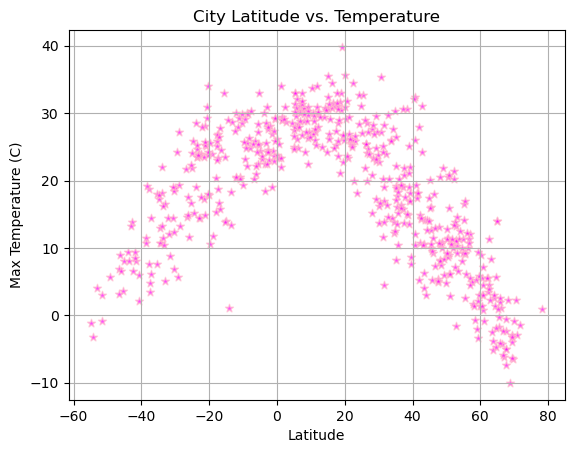

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], marker='*', facecolors='magenta', edgecolors='pink', alpha=0.7)

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
date=city_data_df['Date'].min()
plt.title(f"City Latitude vs. Temperature")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

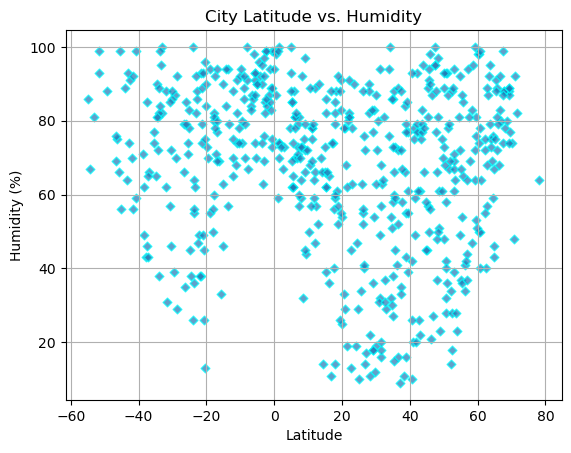

In [10]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind='scatter', x='Lat', y='Humidity', marker='D', facecolors='purple', edgecolors='cyan', alpha=0.7)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

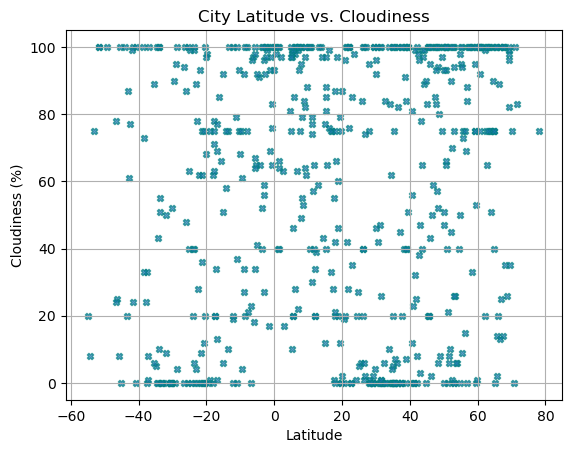

In [11]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind='scatter', x='Lat', y='Cloudiness', marker='X', facecolors='green', edgecolors='teal', alpha=0.7)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

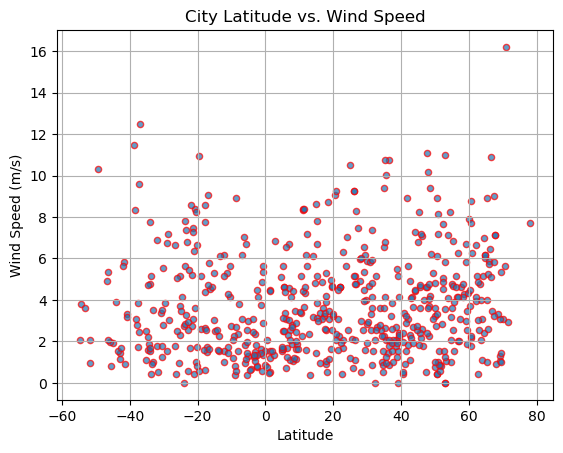

In [12]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind='scatter', x='Lat', y='Wind Speed', marker='o', facecolors='red', edgecolors='red', alpha=0.7)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()
plt.title("City Latitude vs. Wind Speed")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [19]:
# Define a function to create Linear Regression plots
def linReg(x,y):
    (slope,intercept,rvalue,pvalue,stderror)=linregress(x,y)
    reg_values= x*slope + intercept
    plt.plot(x,reg_values,color='r')
    line_eq = f'y = {(round(slope,2))}x + {(round(intercept,2))}'
    print(f'The r-value is: {rvalue}')
    line_eq = f'y = {(round(slope,2))}x + {(round(intercept,2))}'
    print(f'Linear equation: {line_eq}')

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,qaqortoq,60.7167,-46.0333,0.77,78,100,2.18,GL,1715232264
3,jamestown,42.0970,-79.2353,10.77,93,100,3.09,US,1715232264
4,shanting,35.0753,117.4578,26.49,27,100,6.54,CN,1715232264
6,dekalb,33.7504,-84.2333,26.07,76,100,3.60,US,1715232265
7,skovorodino,53.9833,123.9167,12.55,23,6,4.08,RU,1715231968


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<= 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,5.61,88,100,10.32,TF,1715232264
1,invercargill,-46.4000,168.3500,8.90,75,25,5.36,NZ,1715232264
5,waitangi,-43.9535,-176.5597,9.34,89,100,3.88,NZ,1715232196
8,namibe,-15.1961,12.1522,23.53,63,6,3.03,AO,1715232265
16,port mathurin,-19.6833,63.4167,25.55,73,98,10.94,MU,1715232267


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8785324818329185
Linear equation: y = -0.5x + 35.41


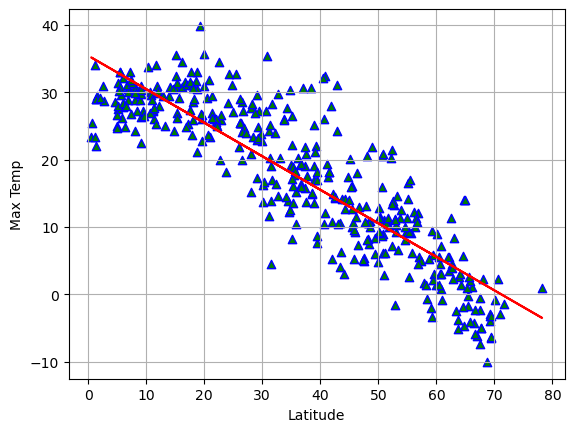

In [25]:
# Linear regression on Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'], marker='^', facecolors='green', edgecolors='blue')

# add graph qualities
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.grid()

# plot details
x = northern_hemi_df['Lat']
y = northern_hemi_df['Max Temp']
linReg(x,y)
plt.show()

The r-value is: 0.7676461172970169
Linear equation: y = 0.45x + 28.89


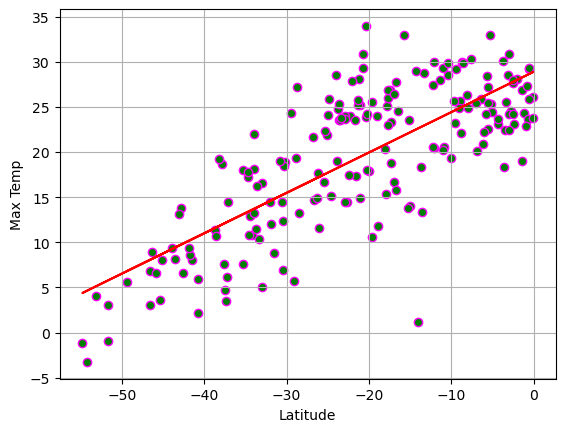

In [26]:
# Linear regression on Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'], marker='o', facecolors='green', edgecolors='magenta')
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.grid()

x = southern_hemi_df['Lat']
y = southern_hemi_df['Max Temp']
linReg(x,y)
plt.show()

**Discussion about the linear relationship:** It makes sense that the max temp decreases as we increase the latitude in the Northern Hemisphere and the inverse is true for the Southern Hemisphere. Both reflect the fact that the temperature increases we get closer to the equator.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.04778457066271133
Linear equation: y = 0.06x + 62.11


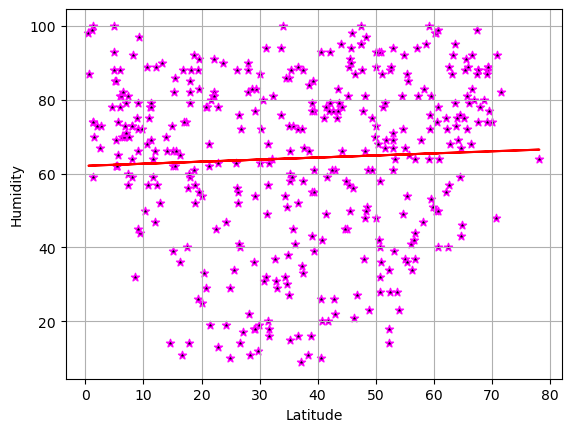

In [28]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Humidity'], marker='*', facecolors='black', edgecolors='magenta')

# other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()

# Linear regression on Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Humidity']
linReg(x,y)
plt.show()

The r-value is: 0.21640092269752484
Linear equation: y = 0.28x + 81.51


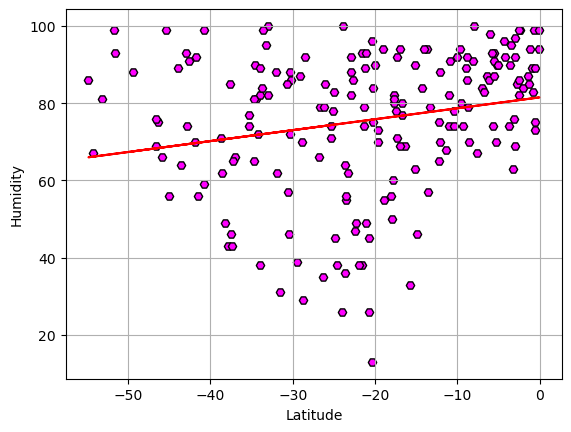

In [27]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Humidity'], marker='H', facecolors='magenta', edgecolors='black')

# other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()

# Linear regression on Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Humidity']
linReg(x,y)
plt.show()#

**Discussion about the linear relationship:** There is a very weak relationship shown between latitude and humidity. In general, as latitude increases, humidity does as well.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.04067973416105981
Linear equation: y = 0.08x + 55.97


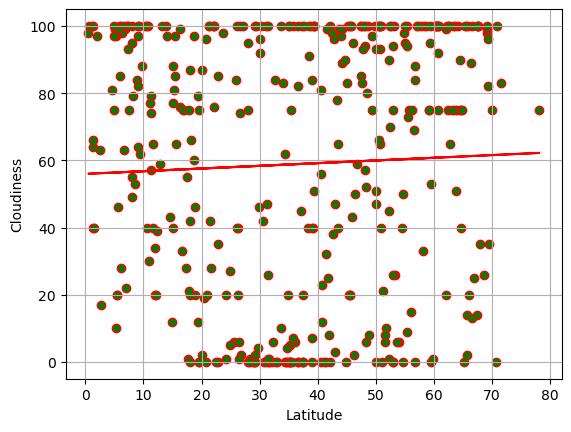

In [29]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'], marker='o', facecolors='green', edgecolors='red')

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()

x = northern_hemi_df['Lat']
y = northern_hemi_df['Cloudiness']
linReg(x,y)
plt.show()

The r-value is: 0.21129157662697204
Linear equation: y = 0.58x + 65.57


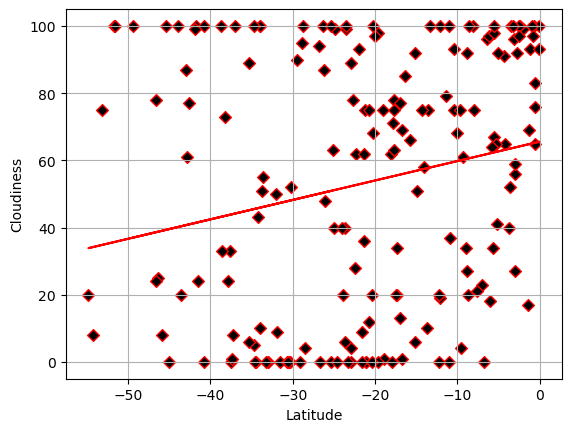

In [30]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'], marker='D', facecolors='black', edgecolors='red')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()

# Linear regression on Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Cloudiness']
linReg(x,y)
plt.show()

**Discussion about the linear relationship:** The r-values indicate weak relationships between latitude and cloudiness. There is a general trend that as latitude increases, so does cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.14238986338754428
Linear equation: y = 0.02x + 3.17


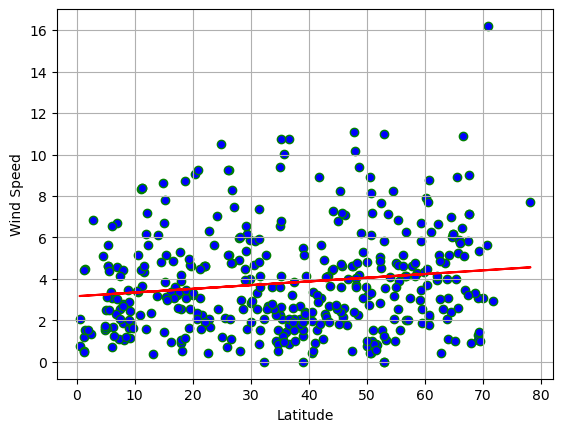

In [31]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'], marker='o', facecolors='blue', edgecolors='green')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid()

# Linear regression on Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Wind Speed']
linReg(x,y)
plt.show()

The r-value is: -0.14468179747088022
Linear equation: y = -0.03x + 2.85


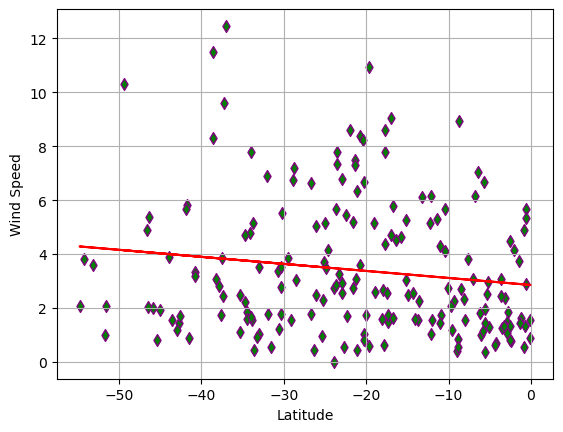

In [32]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'], marker='d', facecolors='green', edgecolors='purple')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid()

# Linear regression on Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Wind Speed']
linReg(x,y)
plt.show()

**Discussion about the linear relationship:** There is markedly little relationship between wind speeds and latitude. The data is too spread to draw any true conclusions.